In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Macro Data - N.xlsx", sheet_name = None, skiprows=1)
sheet_names = df.keys()
gdp = df["GDP sheet"]

In [ ]:
gdp.loc[2:5, "SECTOR"] = "Manufacturing"
gdp.loc[7:, "SECTOR"] = "Services"
# Round the numerical columns (years) to the nearest million
year_columns = [col for col in gdp.columns if isinstance(col, int)]
gdp[year_columns] = gdp[year_columns].apply(lambda x: round(x, 1))
gdp.head()

,SECTOR,GDP SUB SECTOR,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015
0,Agriculture,Agriculture,19535878.8,19306490.3,19091072.8,18738414.4,18348175.9,17958583.7,17544147.7,17179495.3,16607337.3,15952220.1
1,Manufacturing,Oil & Gas,4473237.4,4266505.0,4391424.7,5366193.4,5819391.2,6362630.8,6092477.1,6031717.6,5759816.7,6732507.6
2,Manufacturing,Manufacturing,6848461.3,6754959.3,6661391.8,6502257.6,6291592.1,6469831.9,6420590.3,6288896.8,6302232.4,6586618.6
3,Manufacturing,Power,353922.2,351936.6,333391.7,340923.4,267245.9,275231.6,289292.3,269620.9,231569.7,272431.5
4,Manufacturing,"Water Supply, Waste Mgmt. & Remediation",208142.4,192004.9,170449.9,150013.1,126769.7,122112.0,115780.1,107991.0,103675.4,94883.2


In [ ]:
# Create DataFrames for each sector by filtering the original gdp DataFrame
manufacturing_df = gdp[gdp['SECTOR'] == 'Manufacturing'].copy()
agriculture_df = gdp[gdp['SECTOR'] == 'Agriculture'].copy()
services_df = gdp[gdp['SECTOR'] == 'Services'].copy()

print("Manufacturing DataFrame:")
display(manufacturing_df.head())

print("\nAgriculture DataFrame:")
display(agriculture_df.head())

print("\nServices DataFrame:")
display(services_df.head())

Manufacturing DataFrame:


,SECTOR,GDP SUB SECTOR,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015
1,Manufacturing,Oil & Gas,4473237.4,4266505.0,4391424.7,5366193.4,5819391.2,6362630.8,6092477.1,6031717.6,5759816.7,6732507.6
2,Manufacturing,Manufacturing,6848461.3,6754959.3,6661391.8,6502257.6,6291592.1,6469831.9,6420590.3,6288896.8,6302232.4,6586618.6
3,Manufacturing,Power,353922.2,351936.6,333391.7,340923.4,267245.9,275231.6,289292.3,269620.9,231569.7,272431.5
4,Manufacturing,"Water Supply, Waste Mgmt. & Remediation",208142.4,192004.9,170449.9,150013.1,126769.7,122112.0,115780.1,107991.0,103675.4,94883.2
5,Manufacturing,Construction,2764341.6,2733060.0,2638925.0,2524386.1,2448716.2,2652540.2,2605287.8,2545991.3,2520852.2,2680216.0



Agriculture DataFrame:


,SECTOR,GDP SUB SECTOR,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015
0,Agriculture,Agriculture,19535878.8,19306490.3,19091072.8,18738414.4,18348175.9,17958583.7,17544147.7,17179495.3,16607337.3,15952220.1



Services DataFrame:


,SECTOR,GDP SUB SECTOR,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015
6,Services,Trade,12256261.0,12141373.9,11943701.0,11360895.6,10459701.2,11430547.1,11473791.0,11546445.6,11669061.4,11697587.7
7,Services,Accommodation & Food Services,582962.7,563157.9,544308.0,522280.7,524627.4,637858.8,620190.7,609465.7,619419.2,654215.3
8,Services,Transportation & Storage,820384.4,770117.3,1102814.9,957297.4,823465.0,1059271.4,956641.3,839846.7,808597.3,805455.7
9,Services,Information and Communication,14018169.8,13297990.3,12323041.9,11227068.8,10537144.8,9309924.9,8527659.3,7776897.0,7858698.3,7708113.8
10,Services,"Arts, Entertainment & Recreation",181358.3,174833.4,167664.1,160767.1,158041.0,162935.0,156484.0,152629.9,146580.0,141329.2


In [ ]:
# Select only the year columns for manufacturing and set 'GDP SUB SECTOR' as index
manufacturing_years = manufacturing_df.set_index('GDP SUB SECTOR').select_dtypes(include=np.number)

# Reverse the order of the year columns to calculate growth from earlier to later years
manufacturing_years_asc = manufacturing_years.sort_index(axis=1)

# Calculate the year-on-year growth rate using the standard formula (final - initial) / initial
# Now pct_change(axis=1) will calculate (Year N - Year N-1) / Year N-1
manufacturing_growth_rate = manufacturing_years_asc.pct_change(axis=1).reset_index()

# Add the 'SECTOR' column back
manufacturing_growth_rate['SECTOR'] = 'Manufacturing'

print("Year-on-Year GDP Growth Rate for Manufacturing Sector (including Sector and Sub Sector columns - corrected calculation):")
display(manufacturing_growth_rate.head())

Year-on-Year GDP Growth Rate for Manufacturing Sector (including Sector and Sub Sector columns - corrected calculation):


,GDP SUB SECTOR,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,SECTOR
0,Oil & Gas,NaN,-0.144477,0.047207,0.010073,0.044342,-0.085380,-0.077877,-0.181650,-0.028446,0.048455,Manufacturing
1,Manufacturing,NaN,-0.043176,-0.002116,0.020941,0.007669,-0.027549,0.033484,0.024474,0.014046,0.013842,Manufacturing
2,Power,NaN,-0.149989,0.164319,0.072959,-0.048604,-0.029014,0.275692,-0.022092,0.055625,0.005642,Manufacturing
3,"Water Supply, Waste Mgmt. & Remediation",NaN,0.092663,0.041626,0.072127,0.054689,0.038143,0.183351,0.136233,0.126459,0.084047,Manufacturing
4,Construction,NaN,-0.059459,0.009972,0.023290,0.018137,-0.076841,0.030902,0.045373,0.035672,0.011446,Manufacturing


In [ ]:
# Calculate the year-on-year growth rate for the Agriculture sector
agriculture_years = agriculture_df.set_index('GDP SUB SECTOR').select_dtypes(include=np.number)
# Reverse the order of the year columns to calculate growth from earlier to later years
agriculture_years_asc = agriculture_years.sort_index(axis=1)
agriculture_growth_rate = agriculture_years_asc.pct_change(axis=1).reset_index()
agriculture_growth_rate['SECTOR'] = 'Agriculture'

print("Year-on-Year GDP Growth Rate for Agriculture Sector:")
display(agriculture_growth_rate.head())


Year-on-Year GDP Growth Rate for Agriculture Sector:


,GDP SUB SECTOR,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,SECTOR
0,Agriculture,NaN,0.041067,0.034452,0.021226,0.023622,0.021694,0.021269,0.01882,0.011284,0.011881,Agriculture


In [ ]:
# Calculate the year-on-year growth rate for the Services sector
services_years = services_df.set_index('GDP SUB SECTOR').select_dtypes(include=np.number)
# Reverse the order of the year columns to calculate growth from earlier to later years
services_years_asc = services_years.sort_index(axis=1)
services_growth_rate = services_years_asc.pct_change(axis=1).reset_index()
services_growth_rate['SECTOR'] = 'Services'

print("\nYear-on-Year GDP Growth Rate for Services Sector:")
display(services_growth_rate.head())


Year-on-Year GDP Growth Rate for Services Sector:


,GDP SUB SECTOR,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,SECTOR
0,Trade,NaN,-0.002439,-0.010508,-0.006292,-0.003769,-0.084934,0.086159,0.051299,0.016550,0.009462,Services
1,Accommodation & Food Services,NaN,-0.053188,-0.016069,0.017597,0.028488,-0.177518,-0.004473,0.042175,0.034631,0.035167,Services
2,Transportation & Storage,NaN,0.003900,0.038646,0.139067,0.107282,-0.222612,0.162523,0.152009,-0.301680,0.065272,Services
3,Information and Communication,NaN,0.019536,-0.010409,0.096538,0.091733,0.131818,0.065475,0.097619,0.079116,0.054157,Services
4,"Arts, Entertainment & Recreation",NaN,0.037153,0.041274,0.025251,0.041225,-0.030037,0.017249,0.042901,0.042760,0.037321,Services


In [ ]:
# Get the current list of columns
current_cols = all_sectors_growth_rate.columns.tolist()

# Define the desired order of columns
# Move 'SECTOR' to be after 'GDP SUB SECTOR'
desired_col_order = ['GDP SUB SECTOR', 'SECTOR'] + [col for col in current_cols if col not in ['GDP SUB SECTOR', 'SECTOR']]

# Reindex the DataFrame with the new column order
all_sectors_growth_rate = all_sectors_growth_rate[desired_col_order]

print("Merged Year-on-Year GDP Growth Rate for All Sectors (with reordered columns):")
display(all_sectors_growth_rate.head())

NameError: name 'all_sectors_growth_rate' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by 2024 growth rate for better visualization
all_sectors_growth_rate_sorted = all_sectors_growth_rate.sort_values(by=2024, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='GDP SUB SECTOR', y=2024, hue='SECTOR', data=all_sectors_growth_rate_sorted)
plt.xticks(rotation=90)
plt.title('Year-on-Year GDP Growth Rate by Sub-sector in 2024')
plt.xlabel('GDP Sub Sector')
plt.ylabel('Growth Rate (2024)')
plt.tight_layout()
plt.show()

In [ ]:
# Sort the DataFrame by the '2024' column in descending order
top_5_growth_2024 = all_sectors_growth_rate.sort_values(by=2024, ascending=False)

# Select the top 5 rows and display the relevant columns
print("Top 5 Sectors/Sub-sectors by Year-on-Year GDP Growth Rate in 2024:")
display(top_5_growth_2024[['GDP SUB SECTOR', 'SECTOR', 2024]].head())

In [ ]:
# Sort the gdp DataFrame by the '2024' column in descending order
top_5_gdp_2024 = gdp.sort_values(by=2024, ascending=False)

# Select the top 5 rows and display the relevant columns
print("Top 5 Sectors/Sub-sectors by GDP Contribution in 2024:")
display(top_5_gdp_2024[['GDP SUB SECTOR', 'SECTOR', 2024]].head())

In [ ]:
# Sort the gdp DataFrame by the '2024' column in descending order for better visualization
gdp_2024_sorted = gdp.sort_values(by=2024, ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='GDP SUB SECTOR', y=2024, hue='SECTOR', data=gdp_2024_sorted)
plt.xticks(rotation=90)
plt.title('GDP Contribution by Sub-sector in 2024')
plt.xlabel('GDP Sub Sector')
plt.ylabel('GDP (in millions)') # Assuming the data is in millions based on rounding
plt.tight_layout()
plt.show()

## ***CPI*** *INFLATION*

In [ ]:
dfcpi = pd.read_excel("Macro Data - N.xlsx", sheet_name = None, skiprows=0)
sheet_names = dfcpi.keys()

cpi = dfcpi["CPI sheet"]

# Rename the first column to 'ITEMS'
cpi = cpi.rename(columns={'Unnamed: 0': 'ITEMS'})

# Remove the last 3 rows
cpi = cpi[:-3].copy()


# Round numerical columns in the cpi DataFrame to one decimal place
numerical_cols = cpi.select_dtypes(include=np.number).columns
cpi[numerical_cols] = cpi[numerical_cols].apply(lambda x: round(x, 1))

cpi.tail()

In [ ]:
# Select only the year columns for CPI data and set the text column as index
cpi_years = cpi.set_index('ITEMS').select_dtypes(include=np.number)

# Reverse the order of the year columns to calculate growth from earlier to later years
cpi_years_asc = cpi_years.sort_index(axis=1)

# Calculate the year-on-year inflation rate using the standard formula (final - initial) / initial
# pct_change(axis=1) will calculate (CPI in Year N - CPI in Year N-1) / CPI in Year N-1
cpi_inflation_rate = cpi_years_asc.pct_change(axis=1).reset_index()

print("Year-on-Year CPI Inflation Rate:")
display(cpi_inflation_rate.head())

In [ ]:
# Exclude the 'ITEMS' column and calculate the mean inflation rate across the year columns
cpi_inflation_rate_avg = cpi_inflation_rate.set_index('ITEMS').mean(axis=1)

# Sort the items by their average inflation rate in descending order
highest_inflation_items = cpi_inflation_rate_avg.sort_values(ascending=False)

print("CPI Items with the Highest Average Year-on-Year Inflation Rate (Over the last 10 years):")
display(highest_inflation_items)


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=highest_inflation_items.index, y=highest_inflation_items.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Year-on-Year CPI Inflation Rate by Item (Last 10 Years)')
plt.xlabel('CPI Item')
plt.ylabel('Average Inflation Rate')
plt.tight_layout()
plt.show()

# Task
Analyze the relationship between CPI (inflation) and GDP growth and contributions, identifying which sectors are potentially helped or hurt by rising prices, and visualize these relationships.

## Prepare the data

### Subtask:
Extract the year-on-year inflation rate for "All Items" from the CPI data to represent overall rising prices and reshape the GDP growth rate data and the "All Items" inflation data into a format that allows for easy comparison, with 'Year', 'Sub-sector', 'Growth Rate', and 'Inflation Rate' as columns.


**Reasoning**:
Filter the cpi_inflation_rate DataFrame to select the row where the 'ITEMS' column is "All Items", transpose it, and rename the columns to 'Year' and 'Inflation Rate'.



In [ ]:
all_items_inflation = cpi_inflation_rate[cpi_inflation_rate['ITEMS'] == 'All Items'].transpose().reset_index()
all_items_inflation.columns = ['Year', 'Inflation Rate']

# Remove the first row as it contains the 'ITEMS' label
all_items_inflation = all_items_inflation.iloc[1:].copy()

# Convert the 'Year' column to numeric, handling potential errors by coercing to NaN
all_items_inflation['Year'] = pd.to_numeric(all_items_inflation['Year'].str.replace(' Dec', ''), errors='coerce')

print("All Items Year-on-Year Inflation Rate:")
display(all_items_inflation.head())

**Reasoning**:
Melt the all_sectors_growth_rate DataFrame to transform it from a wide format (years as columns) to a long format (years as rows).



In [ ]:
all_sectors_growth_rate_melted = all_sectors_growth_rate.melt(
    id_vars=['GDP SUB SECTOR', 'SECTOR'],
    var_name='Year',
    value_name='Growth Rate'
)

# Convert the 'Year' column to numeric
all_sectors_growth_rate_melted['Year'] = pd.to_numeric(all_sectors_growth_rate_melted['Year'], errors='coerce')

print("\nMelted All Sectors Year-on-Year GDP Growth Rate:")
display(all_sectors_growth_rate_melted.head())

## Analyze the relationship

### Subtask:
Merge the reshaped GDP growth data with the inflation data based on the year and calculate the correlation between the "All Items" inflation rate and the GDP growth rate for each sub-sector.


**Reasoning**:
Merge the growth rate and inflation data, then calculate the correlation between growth rate and inflation for each sub-sector. Finally, sort and display the results.



In [ ]:
# Merge the melted growth rate data with the inflation data
merged_growth_inflation = pd.merge(all_sectors_growth_rate_melted, all_items_inflation, on='Year')

# Calculate the Pearson correlation coefficient between 'Growth Rate' and 'Inflation Rate' for each sub-sector
correlation_results = merged_growth_inflation.groupby('GDP SUB SECTOR')[['Growth Rate', 'Inflation Rate']].corr().unstack().iloc[:, 1]

# Sort the correlation results in descending order
correlation_results_sorted = correlation_results.sort_values(ascending=False)

print("Correlation between GDP Growth Rate and 'All Items' Inflation Rate by Sub-sector:")
display(correlation_results_sorted)

## Visualize the findings

### Subtask:
Create scatter plots for a few key sub-sectors, with the "All Items" inflation rate on the x-axis and the sub-sector's GDP growth rate on the y-axis. This will visually illustrate the relationship for those sectors.


**Reasoning**:
Choose key sub-sectors to visualize based on their correlation with inflation and create scatter plots for each.



In [ ]:
# Choose a few key sub-sectors to visualize based on correlation results
# Selecting sectors with strong positive, strong negative, and near-zero correlations
selected_sub_sectors = [
    'Financial and Insurance', # Strong Positive Correlation
    'Other Services', # Strong Negative Correlation
    'Construction' # Near Zero Correlation
]

# Create scatter plots for each selected sub-sector
for sub_sector in selected_sub_sectors:
    # Filter the merged DataFrame for the specific sub-sector
    sub_sector_data = merged_growth_inflation[merged_growth_inflation['GDP SUB SECTOR'] == sub_sector]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Inflation Rate', y='Growth Rate', data=sub_sector_data)
    plt.title(f'Inflation Rate vs. GDP Growth Rate for {sub_sector}')
    plt.xlabel('All Items Inflation Rate')
    plt.ylabel('GDP Growth Rate')
    plt.grid(True)
    plt.show()

## Visualize the findings

### Subtask:
Generate line plots showing the "All Items" inflation rate alongside the GDP growth rates of selected sectors over time to see how they move together.


**Reasoning**:
To visualize the relationship between GDP growth and inflation over time, I will generate line plots for the selected sub-sectors. I will iterate through the `selected_sub_sectors` list, filter the `merged_growth_inflation` dataframe for each, and then create a line plot showing the 'Growth Rate' and 'Inflation Rate' over the 'Year'. This will allow for a direct visual comparison of how these two metrics have evolved together for each sector.



In [ ]:
# Create line plots for each selected sub-sector to show trends over time
for sub_sector in selected_sub_sectors:
    # Filter the merged DataFrame for the specific sub-sector
    sub_sector_data = merged_growth_inflation[merged_growth_inflation['GDP SUB SECTOR'] == sub_sector]

    plt.figure(figsize=(12, 6))
    plt.plot(sub_sector_data['Year'], sub_sector_data['Growth Rate'], marker='o', label='GDP Growth Rate')
    plt.plot(sub_sector_data['Year'], sub_sector_data['Inflation Rate'], marker='x', label='Inflation Rate')
    plt.title(f'GDP Growth Rate vs. Inflation Rate Over Time for {sub_sector}')
    plt.xlabel('Year')
    plt.ylabel('Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The correlation analysis revealed varying relationships between different GDP sub-sectors' growth rates and the "All Items" inflation rate.
*   Sectors like 'Financial and Insurance' showed a positive correlation (approximately 0.48) with inflation, suggesting their growth tends to increase as inflation rises.
*   Sectors like 'Other Services' showed a negative correlation (approximately -0.43) with inflation, suggesting their growth tends to decrease as inflation rises.
*   Sectors like 'Construction' showed a near-zero correlation (approximately -0.01) with inflation, indicating little linear relationship between their growth and inflation.
*   Visualizations through scatter plots and line plots further illustrated these relationships over time for selected sectors, confirming the positive correlation for 'Financial and Insurance', negative correlation for 'Other Services', and a less clear linear relationship for 'Construction'.

### Insights or Next Steps

*   Businesses and policymakers could use these correlation insights to anticipate how different sectors might be impacted by changes in the inflation rate.
*   Further analysis could investigate the potential causal mechanisms behind these correlations and explore lead-lag relationships between inflation and sector growth.


# Task
Analyze the relationship between inflation (both overall and for specific categories) and GDP growth and contributions across different sectors and sub-sectors over the last 10 years using the provided "gdp_growth_rate_df" and "cpi_df" dataframes. Visualize the findings and discuss which sectors appear to be positively or negatively impacted by rising prices, supported by the data and visualizations.

## Prepare the data

### Subtask:
Extract and reshape year-on-year inflation rates for key specific CPI items (e.g., Food, Transport, Housing) and prepare them for merging with GDP data.


**Reasoning**:
Filter the `cpi_inflation_rate` DataFrame to select the rows for key specific CPI items and then melt the filtered DataFrame to reshape it into a long format. Convert the 'Year' column to numeric.



In [ ]:
# Define a list of key specific CPI items
key_cpi_items = ['Food', 'Transport', 'Housing Water, Electricity. Gas and Other  Fuel']

# Filter the cpi_inflation_rate DataFrame for the selected key items
specific_cpi_inflation = cpi_inflation_rate[cpi_inflation_rate['ITEMS'].isin(key_cpi_items)].copy()

# Melt the filtered DataFrame to reshape it
specific_cpi_inflation_melted = specific_cpi_inflation.melt(
    id_vars=['ITEMS'],
    var_name='Year',
    value_name='Inflation Rate'
)

# Convert the 'Year' column to numeric, removing " Dec" and coercing errors to NaN
specific_cpi_inflation_melted['Year'] = pd.to_numeric(specific_cpi_inflation_melted['Year'].str.replace(' Dec', ''), errors='coerce')

print("Melted Specific CPI Inflation Rate:")
display(specific_cpi_inflation_melted.head())

## Analyze the relationship

### Subtask:
Calculate the correlation between the inflation rates of key specific CPI items and the GDP growth rate of potentially related sub-sectors.


**Reasoning**:
Merge the melted growth rate data with the melted specific CPI inflation data and then filter and calculate the correlation for each specific CPI item and its related GDP sub-sector(s).



In [ ]:
# Merge the melted growth rate data with the specific inflation data
# We will merge on 'Year' and then filter by 'ITEMS' and 'GDP SUB SECTOR'
merged_specific_inflation_growth = pd.merge(all_sectors_growth_rate_melted, specific_cpi_inflation_melted, on='Year', suffixes=('_GDP', '_CPI'))

# Define the relationships between specific CPI items and potentially related GDP sub-sectors
cpi_gdp_relationships = {
    'Food': ['Agriculture', 'Trade'],
    'Transport': ['Transportation & Storage'],
    'Housing Water, Electricity. Gas and Other  Fuel': ['Power', 'Real Estate']
}

# Calculate and store correlations for each defined relationship
specific_correlation_results = {}

for cpi_item, gdp_sub_sectors in cpi_gdp_relationships.items():
    for gdp_sub_sector in gdp_sub_sectors:
        # Filter the merged DataFrame for the specific CPI item and GDP sub-sector
        filtered_data = merged_specific_inflation_growth[
            (merged_specific_inflation_growth['ITEMS'] == cpi_item) &
            (merged_specific_inflation_growth['GDP SUB SECTOR'] == gdp_sub_sector)
        ]

        # Calculate the correlation between Growth Rate and Inflation Rate
        correlation = filtered_data['Growth Rate'].corr(filtered_data['Inflation Rate'])

        # Store the correlation result
        specific_correlation_results[f'{cpi_item} vs {gdp_sub_sector} Growth'] = correlation

# Display the specific correlation results
print("Correlation between Specific CPI Inflation Rates and Related GDP Sub-sector Growth Rates:")
display(pd.Series(specific_correlation_results).sort_values(ascending=False))

## Visualize the findings

### Subtask:
Create visualizations (e.g., scatter plots, line plots) to show the relationship between inflation in specific CPI items and the growth of relevant GDP sectors.


**Reasoning**:
To visualize the relationship between specific CPI inflation and the growth of related GDP sectors, I will iterate through the `cpi_gdp_relationships` dictionary. For each CPI item and its corresponding GDP sub-sectors, I will filter the `merged_specific_inflation_growth` DataFrame. Then, I will generate both a scatter plot and a line plot to visualize the relationship, as instructed. The scatter plot will show the direct correlation, while the line plot will illustrate how these metrics move together over time. This approach directly addresses all the requirements of the subtask in a single, comprehensive code block.



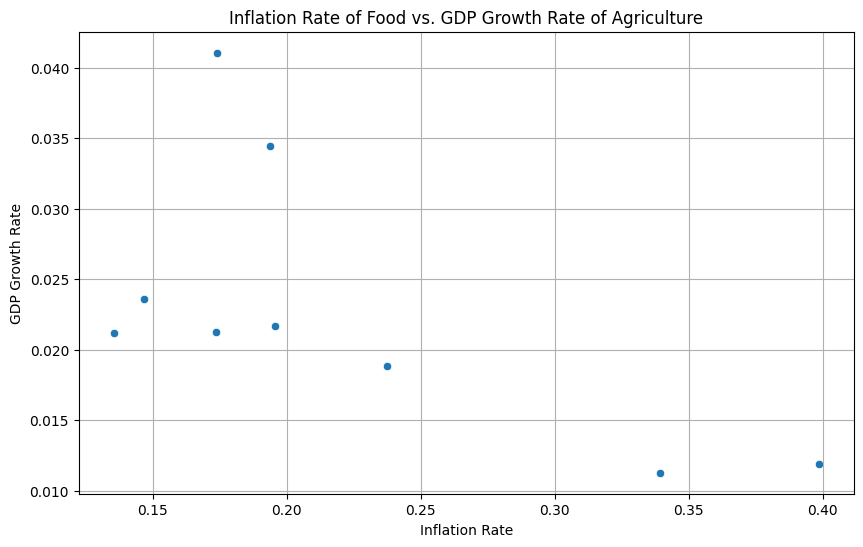

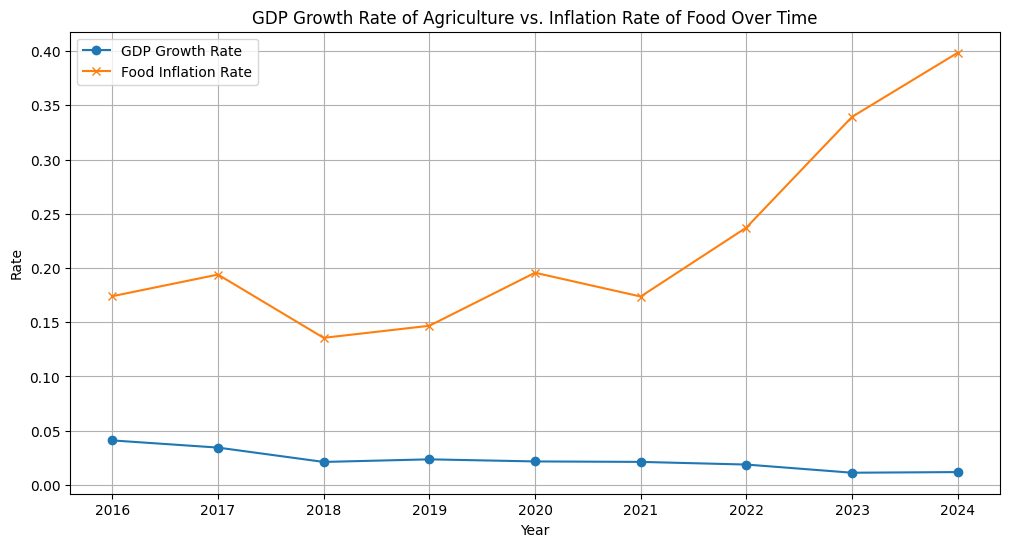

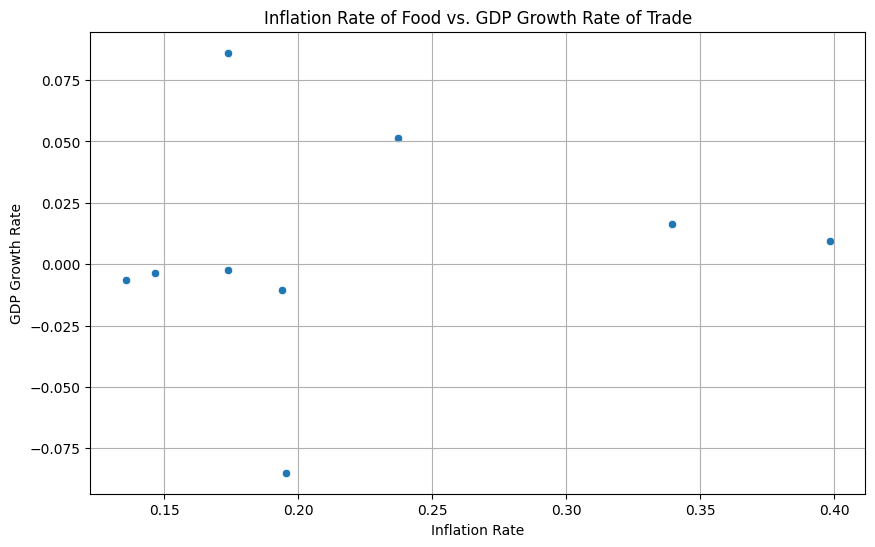

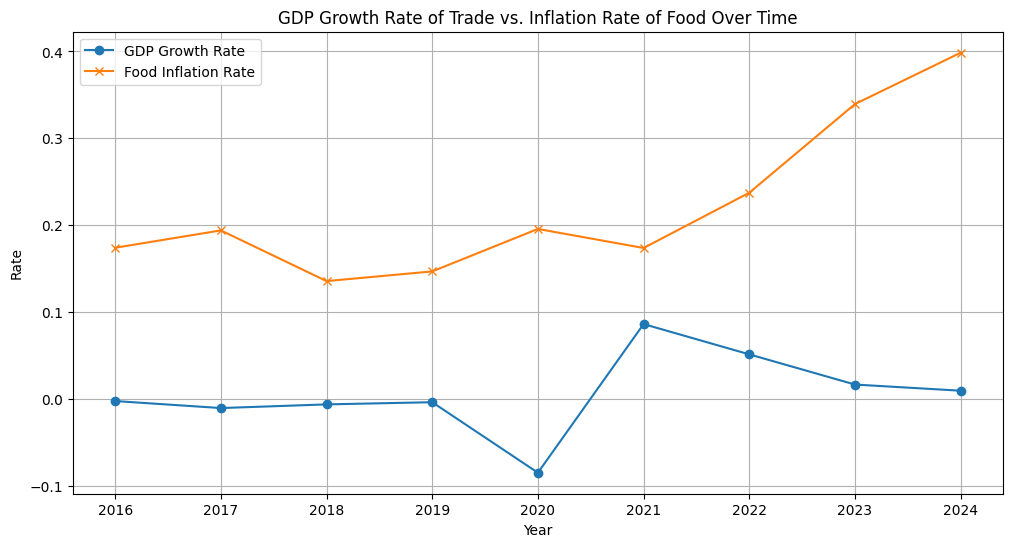

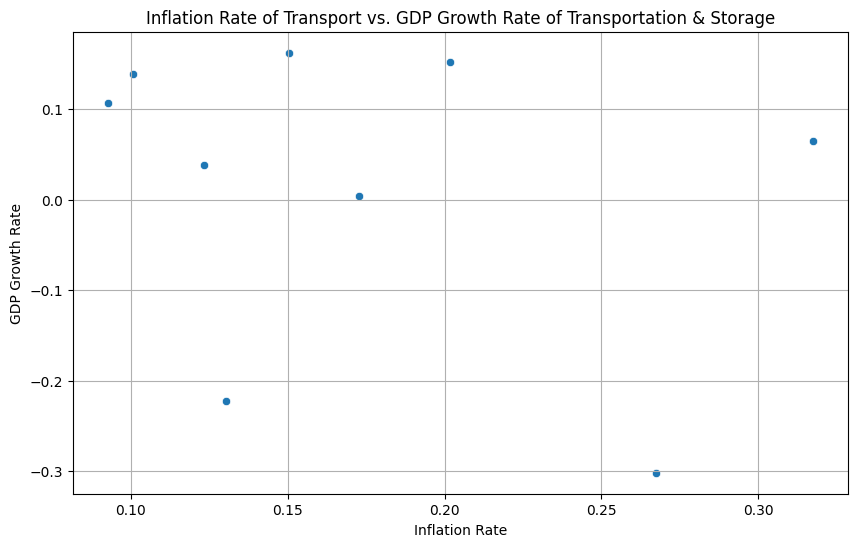

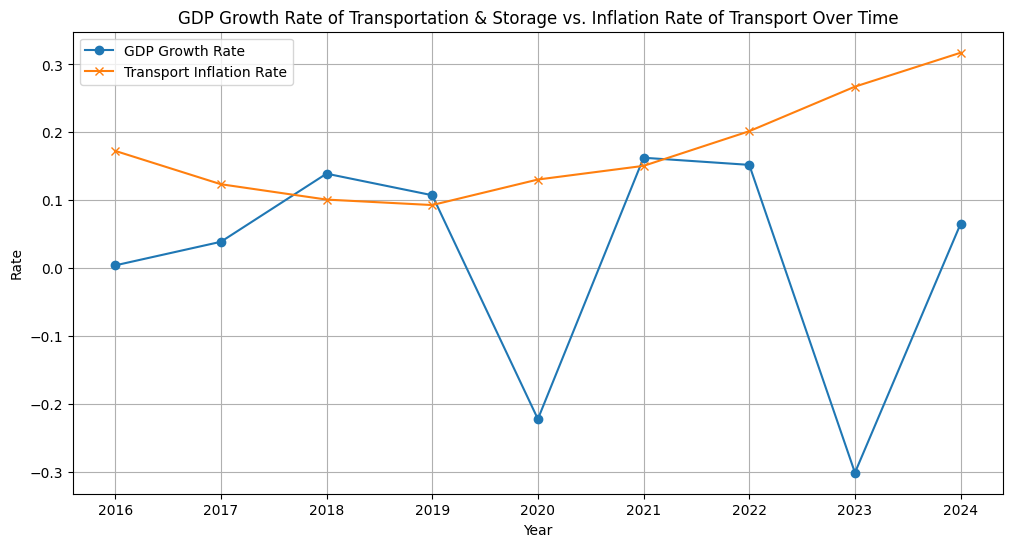

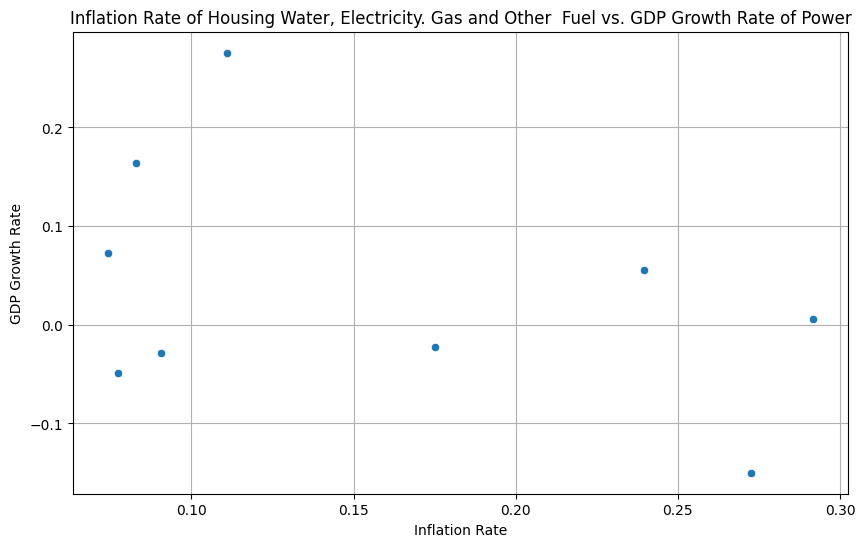

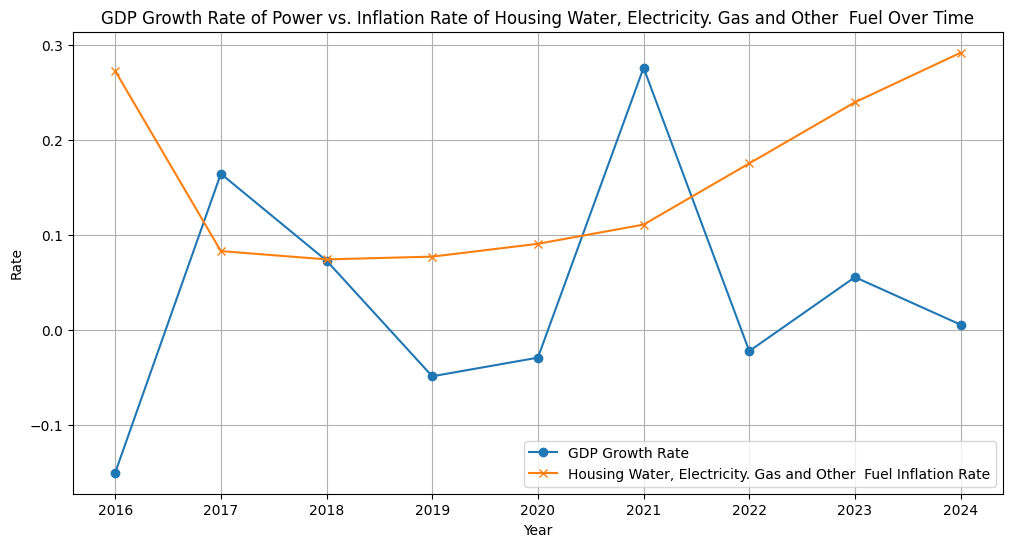

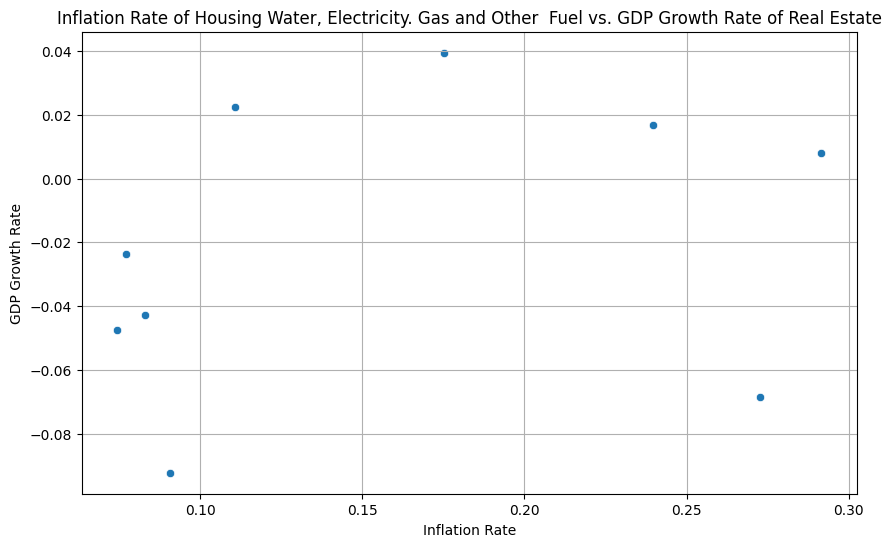

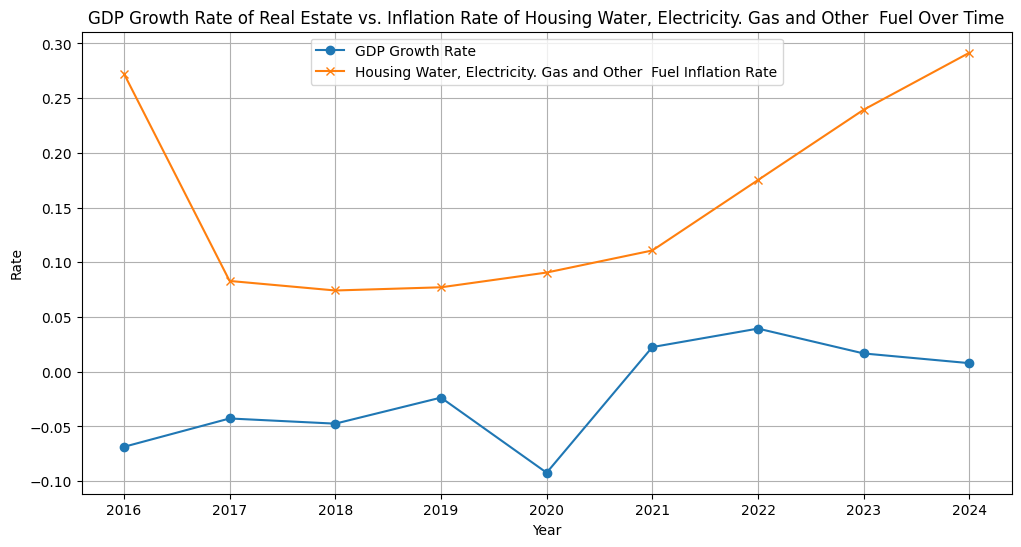

In [ ]:
# Iterate through the relationships to create visualizations
for cpi_item, gdp_sub_sectors in cpi_gdp_relationships.items():
    for gdp_sub_sector in gdp_sub_sectors:
        # Filter the data for the current CPI item and GDP sub-sector
        filtered_data = merged_specific_inflation_growth[
            (merged_specific_inflation_growth['ITEMS'] == cpi_item) &
            (merged_specific_inflation_growth['GDP SUB SECTOR'] == gdp_sub_sector)
        ]

        # Create a scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Inflation Rate', y='Growth Rate', data=filtered_data)
        plt.title(f'Inflation Rate of {cpi_item} vs. GDP Growth Rate of {gdp_sub_sector}')
        plt.xlabel('Inflation Rate')
        plt.ylabel('GDP Growth Rate')
        plt.grid(True)
        plt.show()

        # Create a line plot
        plt.figure(figsize=(12, 6))
        plt.plot(filtered_data['Year'], filtered_data['Growth Rate'], marker='o', label='GDP Growth Rate')
        plt.plot(filtered_data['Year'], filtered_data['Inflation Rate'], marker='x', label=f'{cpi_item} Inflation Rate')
        plt.title(f'GDP Growth Rate of {gdp_sub_sector} vs. Inflation Rate of {cpi_item} Over Time')
        plt.xlabel('Year')
        plt.ylabel('Rate')
        plt.legend()
        plt.grid(True)
        plt.show()

## Summary:

### Data Analysis Key Findings

*   Inflation in specific CPI items shows varying correlations with the growth of related GDP sub-sectors.
*   Housing Water, Electricity. Gas and Other Fuel inflation exhibits a weak positive correlation (0.289) with Real Estate GDP growth and a moderate negative correlation (-0.419) with Power GDP growth.
*   Food inflation has a very weak positive correlation (0.111) with Trade GDP growth but a moderate to strong negative correlation (-0.631) with Agriculture GDP growth.
*   Transport inflation shows a weak negative correlation (-0.286) with Transportation & Storage GDP growth.

### Insights or Next Steps

*   Rising Food and Housing/Utility inflation appear to be negatively associated with growth in the Agriculture and Power sectors, respectively. Further investigation into the causal factors behind these relationships could be beneficial.
*   While some relationships show correlation, the visualizations and correlation values suggest that the impact of specific inflation categories on related GDP sub-sectors is not uniform and can be both positive and negative depending on the sector.


In [ ]:
comp = pd.read_excel("Macro Data - N.xlsx", sheet_name = None, skiprows=1)
sheet_names = df.keys()
com = comp["COMPANY PAT"]
com = com.drop([7, 8, 9]).reset_index(drop=True)
com.head()

,COMPANY,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015
0,Okomu Oil,39957.746,20646.527,16230.805,11538.968,2942.468,5368.348000,8239.903000,9092.18600,4962.072000,2726.017000
1,Conoil,8773.535,9868.239,4957.726,1440.185,1972.322,1972.322000,1796.042000,1578.50700,2837.884000,2307.558000
2,Nestle Niger,-164595.022,-79473.781,48965.488,40037.277,39212.025,45.683113,43.008026,33.72373,7.924968,23.736777
3,Seplat Energy,144792.000,123872.000,104706.000,117176.000,-85322.000,17652.000000,-65199.000000,-45002.00000,-16151.000000,-19897.000000
4,Dangote Cement,503247.000,455583.000,382311.000,364439.000,276068.000,200521.000000,390325.000000,204248.00000,142858.000000,153272.000000


In [ ]:
com.shape

(7, 11)